# Data Exploration for Trace Clustering

# Introduction
In this notebook, we will explore and visualize real event logs. 
We will load, decompress, and parse the logs, followed by data exploration and visualization.


In [23]:
# Loading the Event Logs
import os
import pm4py

def load_event_log(path):
    return pm4py.read_xes(path)

event_log_paths = [
    '../shared/example_files/CoSeLoG-WABO-4.xes',
    '../shared/example_files/CoSeLoG-WABO-1.xes'
    # Add more paths for other event logs if available
]

# Load event logs
logs = [load_event_log(path) for path in event_log_paths if os.path.exists(path)]

parsing log, completed traces ::   0%|          | 0/787 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/937 [00:00<?, ?it/s]

# Parsing the Event Logs
In this section, we will parse the event logs using the pm4py library.

In [24]:
# Converting logs to DataFrames for easier manipulation
import pandas as pd

def convert_log_to_dataframe(log):
    return pm4py.convert_to_dataframe(log)

dataframes = [convert_log_to_dataframe(log) for log in logs]

# Data Exploration
We will explore the event logs to understand the structure and content of the data.

In [25]:
# Example exploration on the first log
df = dataframes[0]

# Event Count
total_events = df.shape[0]
print(f"Total number of events: {total_events}")

# Unique Activities
unique_activities = df['concept:name'].nunique()
print(f"Number of unique activities: {unique_activities}")

# Timeframe
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])
timeframe_start = df['time:timestamp'].min()
timeframe_end = df['time:timestamp'].max()
print(f"Timeframe: {timeframe_start} to {timeframe_end}")

Total number of events: 34848
Number of unique activities: 330
Timeframe: 2009-11-18 00:00:00+00:00 to 2013-12-30 10:26:30+00:00


# Visualization
We will create visualizations to better understand the distribution and trends in the event logs.

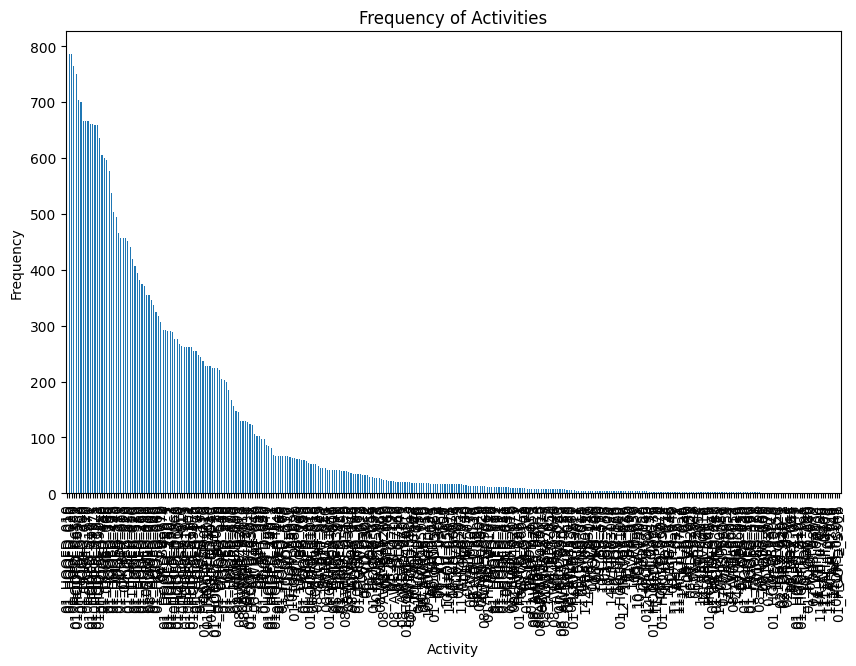

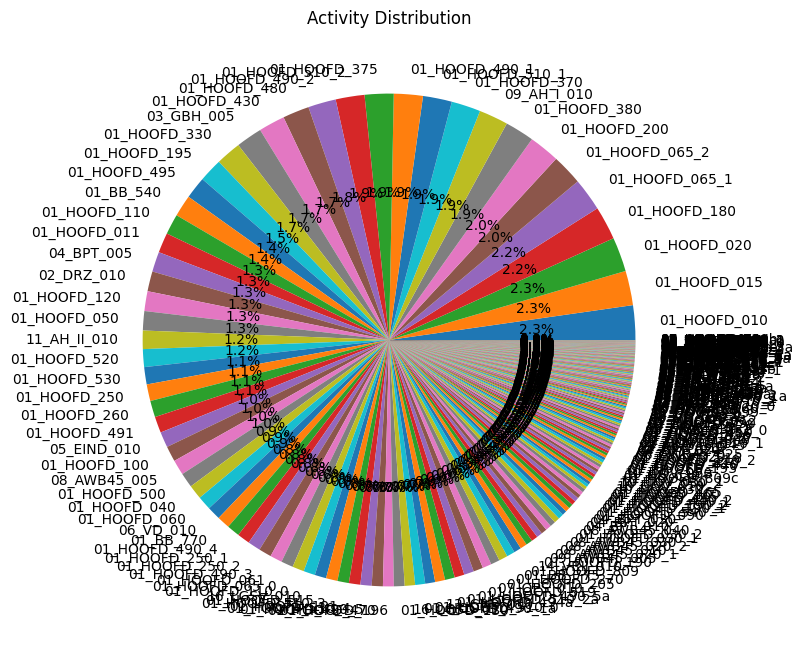

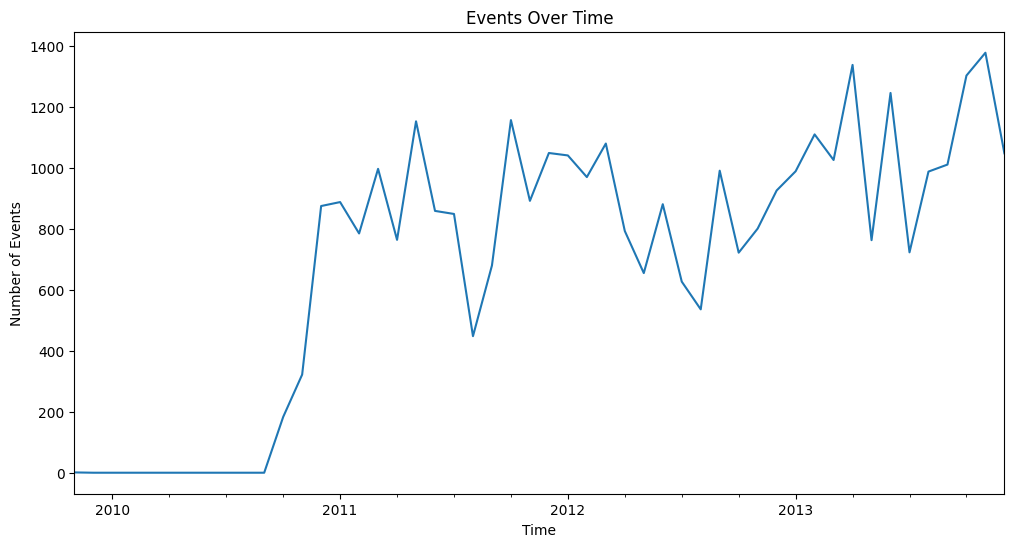

In [26]:
import matplotlib.pyplot as plt

# Bar Chart for Activity Frequency
activity_counts = df['concept:name'].value_counts()
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title('Frequency of Activities')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.show()

# Pie Chart for Activity Distribution
plt.figure(figsize=(8, 8))
activity_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Activity Distribution')
plt.ylabel('')
plt.show()

# Line Chart for Events Over Time
events_over_time = df.resample('ME', on='time:timestamp').size()  # Updated 'M' to 'ME'
plt.figure(figsize=(12, 6))
events_over_time.plot(kind='line')
plt.title('Events Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.show()

# Exploration and Visualization for Additional Event Logs
We will now explore and visualize the additional event logs in our dataset.


Exploration and visualization for event log 2
Total number of events: 38944
Number of unique activities: 380
Timeframe: 2010-10-05 00:00:00+00:00 to 2014-01-07 00:00:00+00:00


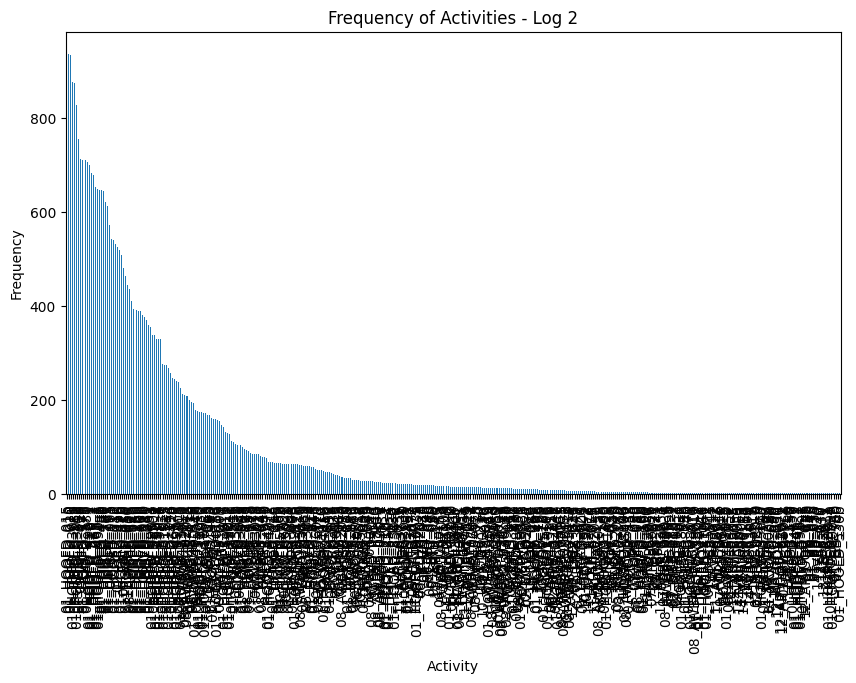

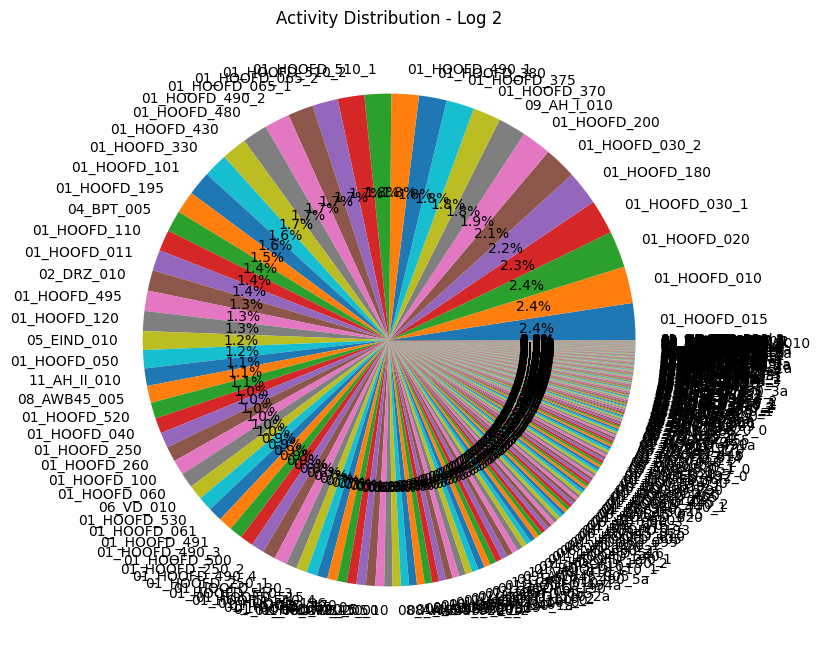

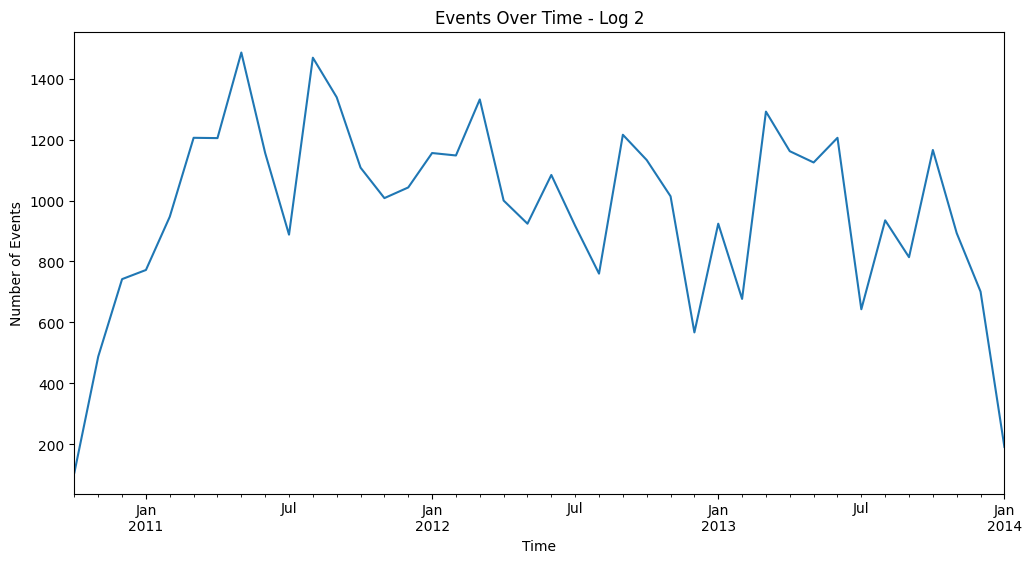

In [27]:
for i, df in enumerate(dataframes[1:], start=2):
    print(f"\nExploration and visualization for event log {i}")
    # Event Count
    total_events = df.shape[0]
    print(f"Total number of events: {total_events}")

    # Unique Activities
    unique_activities = df['concept:name'].nunique()
    print(f"Number of unique activities: {unique_activities}")

    # Timeframe
    df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])
    timeframe_start = df['time:timestamp'].min()
    timeframe_end = df['time:timestamp'].max()
    print(f"Timeframe: {timeframe_start} to {timeframe_end}")

    # Bar Chart for Activity Frequency
    activity_counts = df['concept:name'].value_counts()
    plt.figure(figsize=(10, 6))
    activity_counts.plot(kind='bar')
    plt.title(f'Frequency of Activities - Log {i}')
    plt.xlabel('Activity')
    plt.ylabel('Frequency')
    plt.show()

    # Pie Chart for Activity Distribution
    plt.figure(figsize=(8, 8))
    activity_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Activity Distribution - Log {i}')
    plt.ylabel('')
    plt.show()

    # Line Chart for Events Over Time
    events_over_time = df.resample('ME', on='time:timestamp').size()  # Updated 'M' to 'ME'
    plt.figure(figsize=(12, 6))
    events_over_time.plot(kind='line')
    plt.title(f'Events Over Time - Log {i}')
    plt.xlabel('Time')
    plt.ylabel('Number of Events')
    plt.show()